# 1. Περιγραφη

Στην εργασία αυτή θα ασχοληθούμε με την ανάπτυξη μοντέλων παλινδρόμησης για δεδομένα που μας δίνονται σε μορφή πίνακα (tabular data). Στόχος είναι η εξοικείωσή σας με τα εργαλεία και τις διαδικασίες που ακολουθούνται για την επεξεργασία και ανάλυση τέτοιων δεδομένων, την ανάπτυξη μοντέλων γραμμικής παλινδρόμησης, καθώς και τη συγγραφή σχετικών αναφορών.
Συγκεκριμένα, θα προ-επεξεργαστούμε δεδομένα και θα αναπτύξουμε μοντέλα παλινδρόμησης για την εκτίμηση της μέσης θερμοκρασίας μιας πόλης του κόσμου, βάσει μετρήσεων που έχουν πραγματοποιηθεί σε πάνω από 1000 πόλεις. Το σύνολο δεδομένων δίνεται σε μορφή CSV (comma-separated values), με την στήλη `avg_temp_c` να είναι εκείνη που μας ενδιαφέρει και να περιγράφει την μέση θερμοκρασία μιας πόλης ανά ημέρα. Τα δεδομένα ανανεώνονται σε τακτά χρονικά
διαστήματα μέσω του Metostat API.


# 2. Φόρτωση Δεδομένων

Αρχικά εισάγονται οι απαραίτητες βιβλιοθήκες της Python και το σύνολο δεδομένων. Για να εγκατασταθούν οι βιβλιοθήκες, χρειάζεται να εκτελεστεί η εντολή: `pip install -r project_1/requirements.txt`

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import missingno as msno

In [3]:
file_path = 'project_1/weather_data.csv'

df = pd.read_csv(file_path)

print(df.head())
print('\n')
print(df.info())
print('\n')
print(df.describe())

       country capital        date  season  avg_temp_c  min_temp_c  \
0  Afghanistan   Kabul  1966-03-02  winter         7.1         NaN   
1  Afghanistan   Kabul  1966-03-28  spring         7.9         NaN   
2  Afghanistan   Kabul  1966-05-02  spring        18.8         NaN   
3  Afghanistan   Kabul  1966-05-04  spring        19.7         NaN   
4  Afghanistan   Kabul  1966-05-18  spring        24.6         NaN   

   max_temp_c  precipitation_mm  snow_depth_mm  avg_wind_dir_deg  \
0         NaN               NaN            NaN               NaN   
1         NaN               NaN            NaN               NaN   
2        22.2               NaN            NaN               NaN   
3        27.2               NaN            NaN               NaN   
4         NaN               NaN            NaN               NaN   

   avg_wind_speed_kmh  peak_wind_gust_kmh  avg_sea_level_pres_hpa  \
0                 NaN                 NaN                     NaN   
1                 NaN           

## 2.1 Διερεύνηση των δεδομένων (EDA) και προ-επεξεργασία

In [4]:
# Μετρατροπή του τυπου δεδομένων της στήλης 'date'
df['date'] = pd.to_datetime(df['date'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3326654 entries, 0 to 3326653
Data columns (total 15 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   country                 object        
 1   capital                 object        
 2   date                    datetime64[ns]
 3   season                  object        
 4   avg_temp_c              float64       
 5   min_temp_c              float64       
 6   max_temp_c              float64       
 7   precipitation_mm        float64       
 8   snow_depth_mm           float64       
 9   avg_wind_dir_deg        float64       
 10  avg_wind_speed_kmh      float64       
 11  peak_wind_gust_kmh      float64       
 12  avg_sea_level_pres_hpa  float64       
 13  sunshine_total_min      float64       
 14  region                  object        
dtypes: datetime64[ns](1), float64(10), object(4)
memory usage: 380.7+ MB
None


Στο παρακάτω code block, γίνεται ο έλεγχος για την εύρεση ελλιπών τιμών με τη χρήση της `isnull`. Επίσης με τη χρήση της βιβλιοθήκης `missingo` παρατηρείται οπτικά για ένα δείγμα 1000 μετρήσεων απο το σύνολο δεδομένων σε ποιές στήλες ανήκουν οι περισσότερες απο αυτές.

         country  capital   date  season  avg_temp_c  min_temp_c  max_temp_c  \
0          False    False  False   False       False        True        True   
1          False    False  False   False       False        True        True   
2          False    False  False   False       False        True       False   
3          False    False  False   False       False        True       False   
4          False    False  False   False       False        True        True   
...          ...      ...    ...     ...         ...         ...         ...   
3326649    False    False  False   False       False       False       False   
3326650    False    False  False   False       False       False       False   
3326651    False    False  False   False       False       False       False   
3326652    False    False  False   False       False       False       False   
3326653    False    False  False   False       False       False       False   

         precipitation_mm  snow_depth_m

<Axes: >

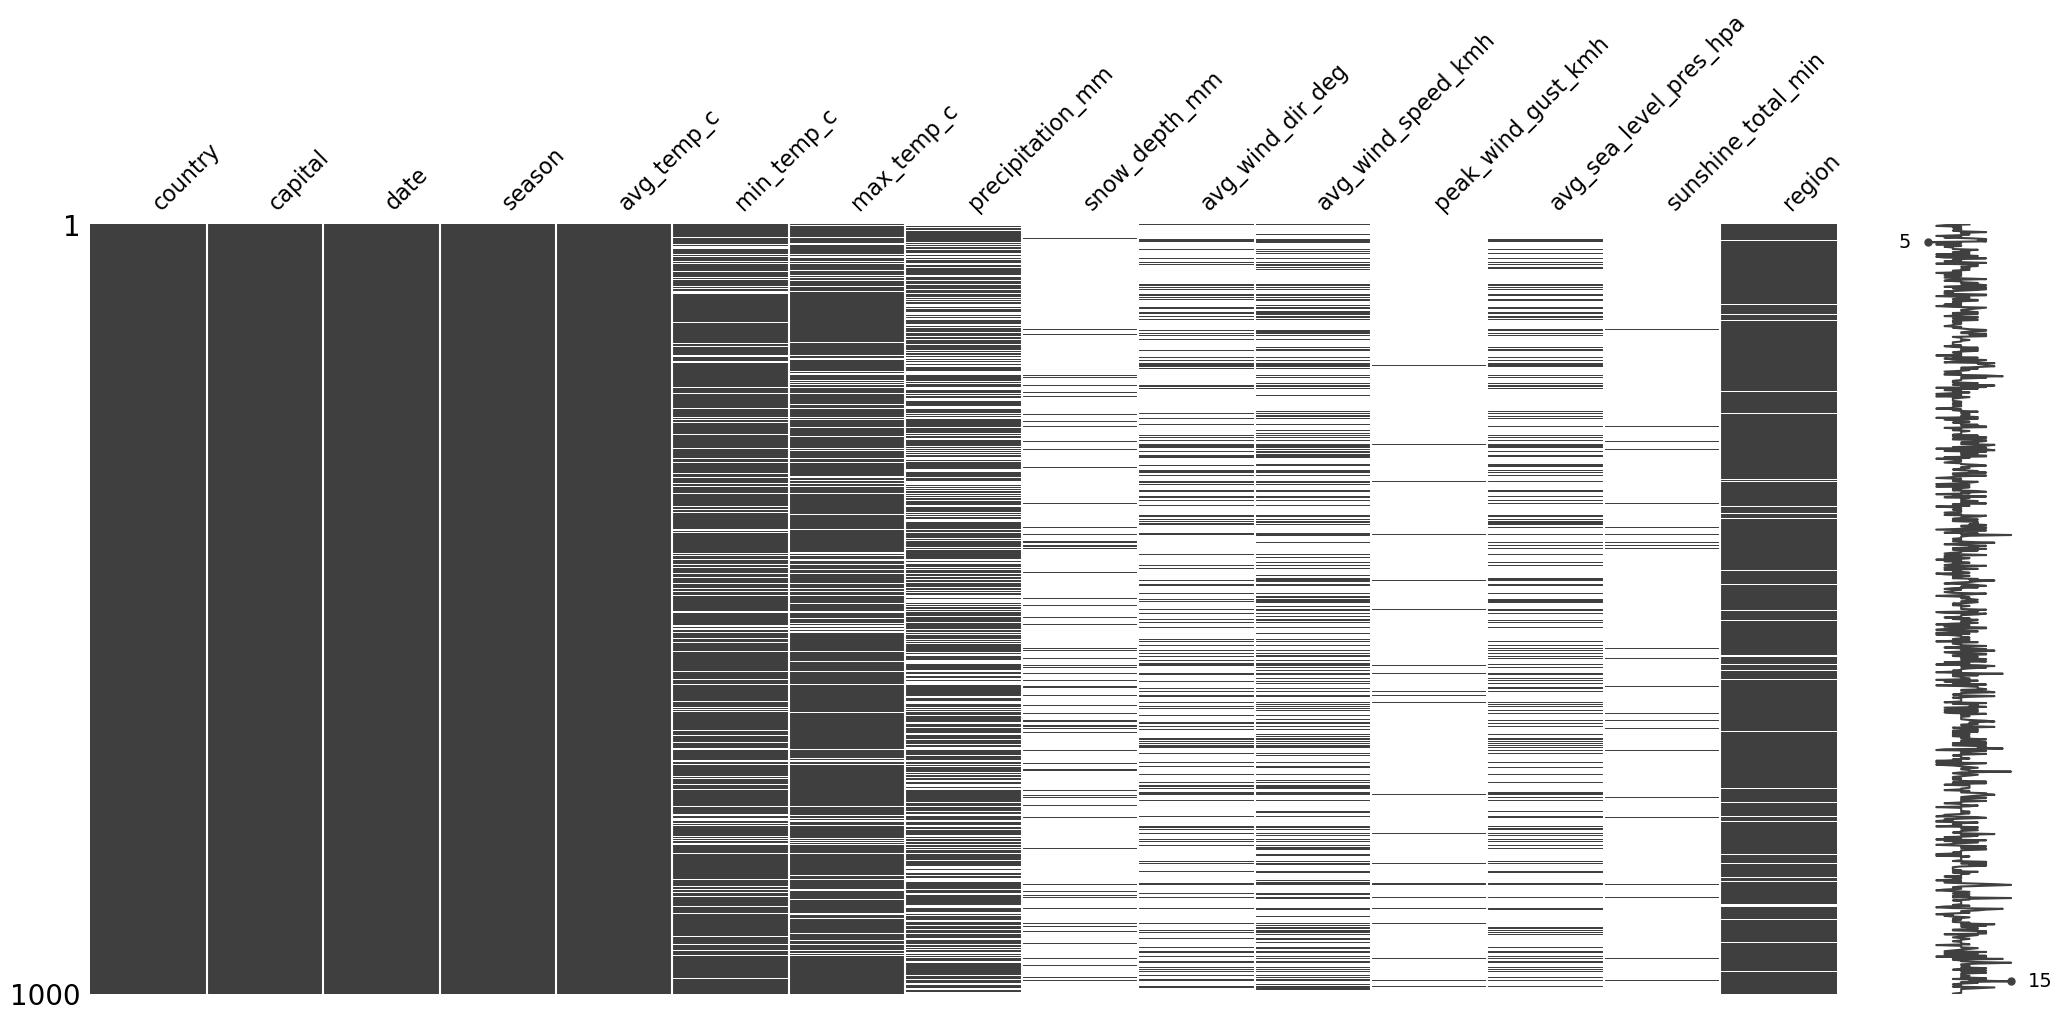

In [5]:
# Έλεγχος τιμών null
print(df.isnull())

# Εμφάνιση διαγράμματος απεικόνισης ελλιπών τιμ΄ών
msno.matrix(df.sample(1000))

<Axes: >

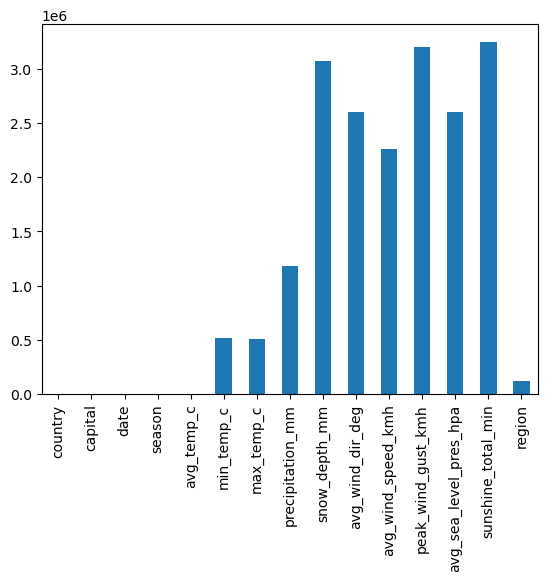

In [6]:
df.isna().sum().plot(kind='bar')

Σύμφωνα με τα παραπάνω γράφηματα παρατηρείται πως οι ελλιπείς τιμές στα δεδομένα είναι αρκετές ωστόσο η πυκνότητα αυτών απο στήλη σε στήλη διαφέρει.

Σγυκεκριμένα αυτές βρίσκονται στις στήλες: `min_temp_c`, `max_temp_c`, `precipitation_mm`, `snow_depth_mm`, `avg_wind_dir_deg`, `avg_wind_speed_kmh`, `peak_wind_gust_kmh`, `avg_sea_level_pres_hpa`, `sunshine_total_min`, `region`.

Οι στήλες `precipitation_mm`, `snow_depth_mm`, `avg_wind_dir_deg`, `avg_wind_speed_kmh`, `peak_wind_gust_kmh`, `avg_sea_level_pres_hpa`, `sunshine_total_min` έχουν πάρα πολλές ελλιπείς τιμές σε βαθμό τέτοιο που δεν αξίζει να συμπερλιφθούν για περεταίρω ανάλυση αλλά και χρήση για τις προβλέψεις.

Για να μπορέσουμε ωστόσο να χρησιμοποιησούμε το dataset χωρις ελλιπείς τιμές, θα μπορούσαμε να αντικαταστήσουμε τα αριθμητικά γνωρίσματα με το μέσο όρο τους.

Οι στήλες `region` & `country` δε προσδίδουν κάτι στο dataset ως προς την ανάλυση που θα απαιτείται συνεπώς μπορούν και αυτές να αφαιρεθούν καθώς η στήλη `capital` είναι αρκετή για δοθεί η γεωγραφική σημασιολογία των δεδομένων.

In [7]:
df = df.drop(columns=['region', 'country', 'precipitation_mm', 'snow_depth_mm', 'avg_wind_dir_deg', 'avg_wind_speed_kmh', 'peak_wind_gust_kmh', 'avg_sea_level_pres_hpa', 'sunshine_total_min'])

df['min_temp_c']=df['min_temp_c'].replace(np.nan , df['min_temp_c'].mean())
df['max_temp_c']=df['max_temp_c'].replace(np.nan , df['max_temp_c'].mean())

<Axes: >

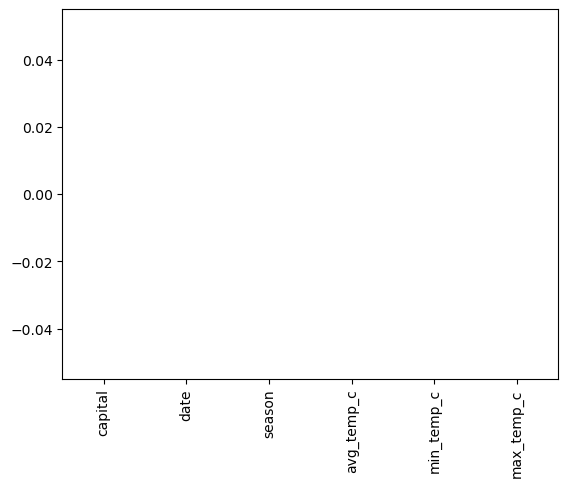

In [8]:
df.isna().sum().plot(kind='bar')

### Οπτικοποιήσεις

Με το παρακάτω code block, εξάγονται τα ιστογράμματα των γνωρισμάτων και έτσι διακρίνεται η κατανομή των τιμών τους μέσω των οποίων μπορούμε να σημειώσουμε κάποιες παρατηρήσεις σχετικά με τα δεδομένα όπως για παράδειγμα η στήλη που περιλαμβάνει τις ημερομηνίες αυτών (`date`) έχει περισσότερες τιμές όσο κοντίτερα στο παρόν αυτές βρίσκονται. Συνεπώς μπορούμε να πούμε οτι υπάρχει κάποιο bias ως προς αυτό.

Στις στήλες `avg_temp_c`, `min_temp_c` παρατηρείται η εμφάνιση κάποιων τιμών οι οποίες βρίσκονται αρκετά εκτός απο το εύρος τιμών του συνόλου δεδομένων (outliers) επομένως θα πρέπει να χειριστούν ανάλογα με κάποιες κανονικοποιήσεις προκειμένου να αποφευχθεί η αλλοίωση των αποτελεσμάτων.

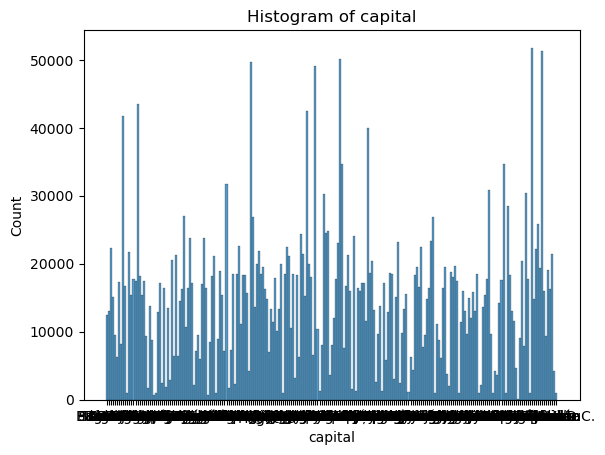

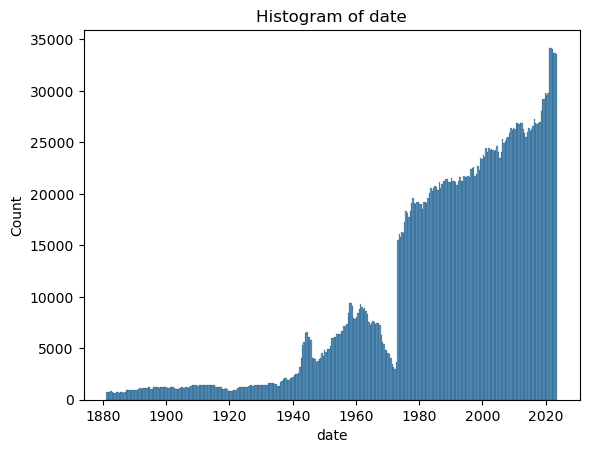

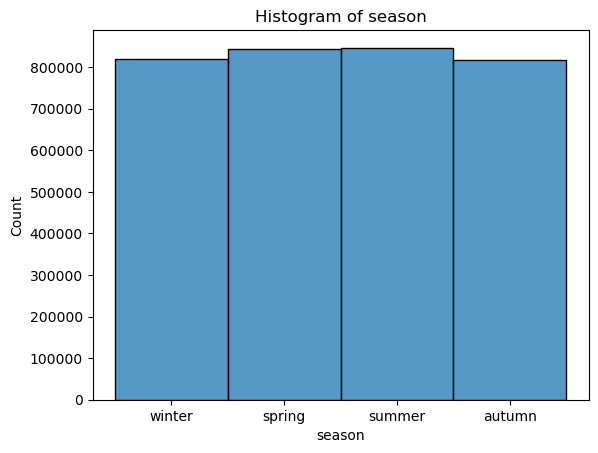

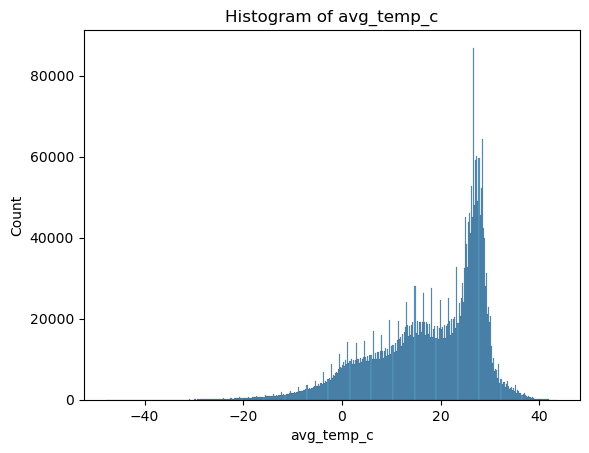

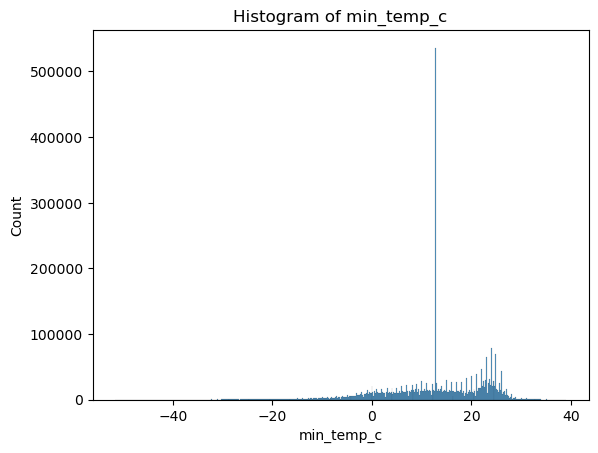

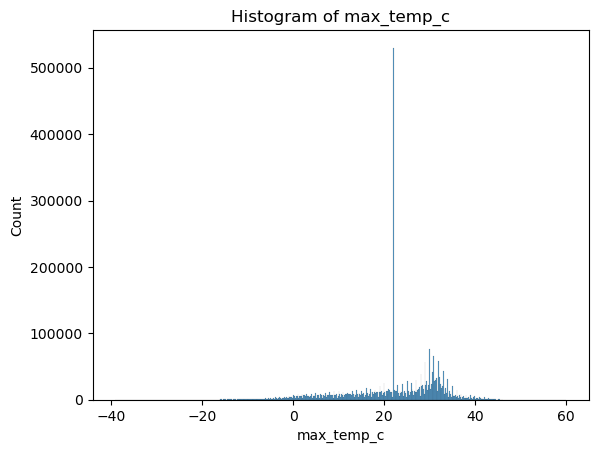

In [9]:
for column in df.columns:
    sns.histplot(df[column], kde=False)
    plt.title(f'Histogram of {column}')
    plt.show()

Η συνάρτηση `sns.pairplot()` δημιουργεί ένα πλέγμα από διαγράμματα όπου το καθένα δείχνει τη σχέση μεταξύ δύο μεταβλητών. Αφού έχει καθοριστεί: `y_vars='avg_temp_c'`, ο άξονας y κάθε διαγράμματος θα αντιπροσωπεύει τη στήλη `avg_temp_c` σε σχέση με όλες τις άλλες αριθμητικές στήλες.

Για παράδειγμα, το pairplot δείχνει πώς μεταβάλλεται η μέση θερμοκρασία σε σχέση με κάθε μία από αυτές τις μεταβλητές (`min_temp_c`, `max_temp_c`).






*Μόνο τα αριθμητικά γνωρίσματα λαμβάνονται υπόψη για τη δημιουργία διαγραμμάτων ανά δύο.

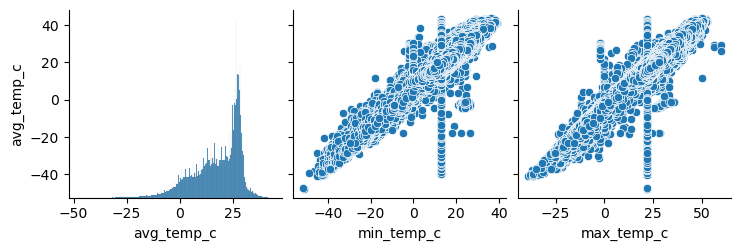

In [10]:
sns.pairplot(df, y_vars='avg_temp_c')

In [11]:
df.head()

,capital,date,season,avg_temp_c,min_temp_c,max_temp_c
0,Kabul,1966-03-02,winter,7.1,12.846717,22.007248
1,Kabul,1966-03-28,spring,7.9,12.846717,22.007248
2,Kabul,1966-05-02,spring,18.8,12.846717,22.200000
3,Kabul,1966-05-04,spring,19.7,12.846717,27.200000
4,Kabul,1966-05-18,spring,24.6,12.846717,22.007248


Για τη διαχείρηση και επεξεργασία των κατηγορικών γνωρισμάτων μπορούμε να επιστρατεύσουμε τη τεχνική του one hot encoding μετατρέποντας έτσι τα γνωρίσματα σε αριθμητικά με τη κάθε τιμή των γννωρισμάτων να μετατρέπεται σε δυαδική αναπαράσταση δημιουργώντας μια νέα στήλη για κάθε περίπτωση τιμής.

Αυτή η μέθοδος συστήνεται για προβλήματα παλινδρόμησης όπου και τα δεδομένα δεν έχουν ταξινομική σημασία.

Αυτό βέβαια μεγαλώνει πάρα πολύ το dataset και η υπολογιστική ισχύς που απαιτείται για την υλοποίηση των παρακάτω βημάτων καθυστερεί επομένως θα κάνουμε drop κάποιες τυχαίες εγγραφές στα δεδομένα προκειμένου τόσο να μπορούν οι αναλύσεις να πραγματοποιηθούν, όσο και τα αποτελέσματα αυτών να μην είναι ιδιαίτερα αλλοιωμένα.

Σχετικά με την επεξεργασία της στήλης `date`, αυτή μπορεί να μετατραπεί σε αριθμητικές τιμήες χρησιμοποιώντας τη κυκλική κωδικοποίηση εφόσον το φαινόμενο αυτό είναι περιοδικό.

In [12]:
# Μετατροπή της στήλης `date` σε τριγωνομετρική-κυκλική αναπαράσταση
df['month_sin'] = np.sin(2 * np.pi * df['date'].dt.month / 12)
df['month_cos'] = np.cos(2 * np.pi * df['date'].dt.month / 12)

df['day_sin'] = np.sin(2 * np.pi * df['date'].dt.day / 31)
df['day_cos'] = np.cos(2 * np.pi * df['date'].dt.day / 31)

df['year_sin'] = np.sin(2 * np.pi * df['date'].dt.year)
df['year_cos'] = np.cos(2 * np.pi * df['date'].dt.year)

df.drop(columns=['date'], inplace=True)

df.head()

,capital,season,avg_temp_c,min_temp_c,max_temp_c,month_sin,month_cos,day_sin,day_cos,year_sin,year_cos
0,Kabul,winter,7.1,12.846717,22.007248,1.0,6.123234e-17,0.394356,0.918958,-9.783804e-14,1.0
1,Kabul,spring,7.9,12.846717,22.007248,1.0,6.123234e-17,-0.571268,0.820763,-9.783804e-14,1.0
2,Kabul,spring,18.8,12.846717,22.200000,0.5,-8.660254e-01,0.394356,0.918958,-9.783804e-14,1.0
3,Kabul,spring,19.7,12.846717,27.200000,0.5,-8.660254e-01,0.724793,0.688967,-9.783804e-14,1.0
4,Kabul,spring,24.6,12.846717,22.007248,0.5,-8.660254e-01,-0.485302,-0.874347,-9.783804e-14,1.0


In [35]:
df_ohe_encoded = pd.get_dummies(df, columns=['capital', 'season'])

df_ohe_encoded = df_ohe_encoded.sample(n=100000, random_state=42)

df_ohe_encoded.head()

,avg_temp_c,min_temp_c,max_temp_c,month_sin,month_cos,day_sin,day_cos,year_sin,year_cos,capital_Abu Dhabi,...,capital_Windhoek,capital_Yamoussoukro,capital_Yaoundé,capital_Yaren,capital_Yerevan,capital_Zagreb,season_autumn,season_spring,season_summer,season_winter
404532,31.7,27.6,36.6,1.224647e-16,-1.000000,-0.848644,0.528964,4.525270e-14,1.0,False,...,False,False,False,False,False,False,False,False,True,False
2987677,23.8,17.2,28.3,1.224647e-16,-1.000000,-0.998717,-0.050649,-7.877968e-13,1.0,False,...,False,False,False,False,False,False,False,False,True,False
45377,12.4,9.6,17.0,-2.449294e-16,1.000000,-0.101168,-0.994869,1.883434e-13,1.0,False,...,False,False,False,False,False,False,True,False,False,False
842193,8.5,3.6,9.5,5.000000e-01,0.866025,-0.998717,-0.050649,-1.275867e-12,1.0,False,...,False,False,False,False,False,False,False,False,False,True
2786632,9.4,7.8,13.1,-5.000000e-01,-0.866025,0.968077,-0.250653,2.275420e-13,1.0,False,...,False,False,False,False,False,False,False,False,True,False


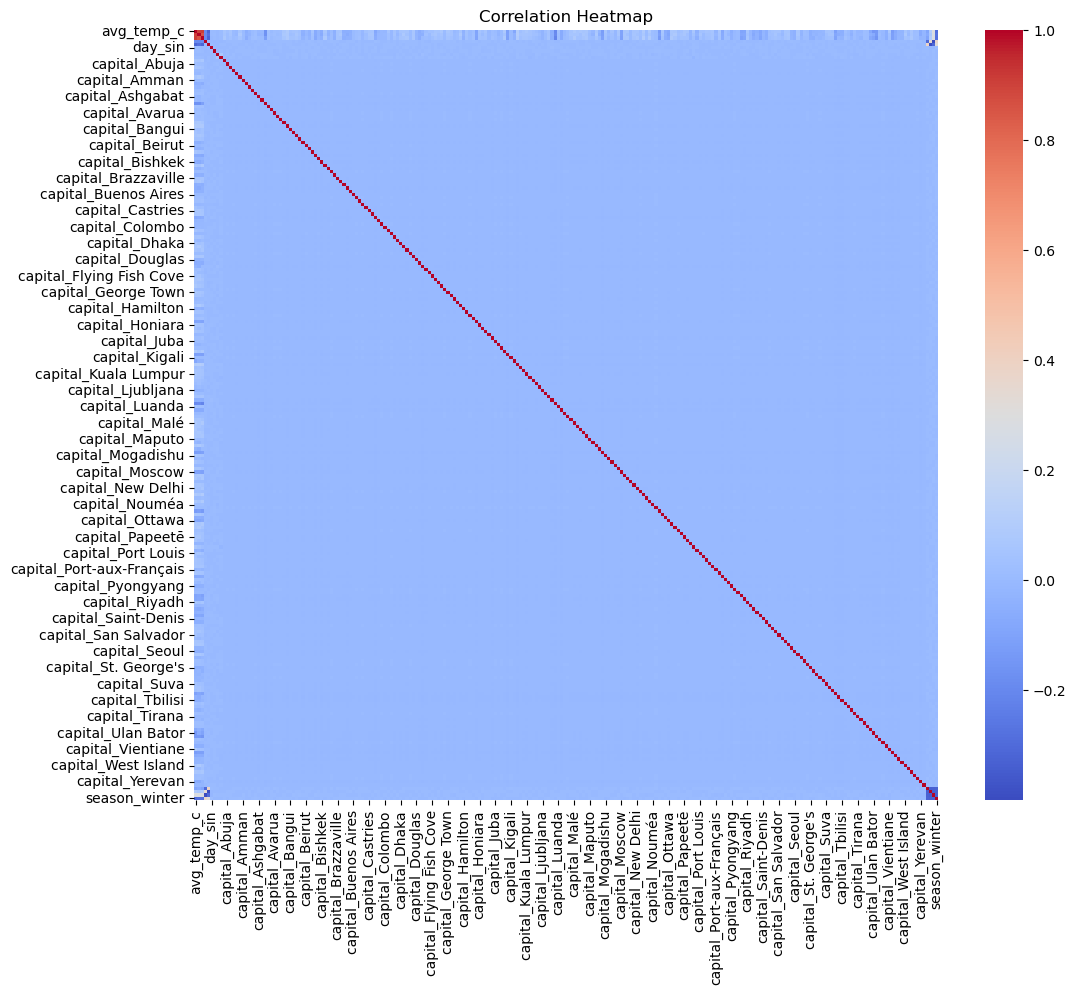

In [27]:
correlation_matrix = df_ohe_encoded.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False)
plt.title('Correlation Heatmap')
plt.show()

### Ποιές είναι οι 5 πιο ζεστές πόλεις του κόσμου βάσει του dataset;

In [28]:
# Ταξινομούμε τις πιο ζεστές πρωτεύουσες με βάση τη μέση θερμοκρασία σε φθίνουσα σειρά και παίρνουμε τις πρώτες 5
hottest = df.groupby('capital').apply(lambda x: x.sort_values(by='avg_temp_c', ascending=False).head(1))
hottest.sort_values(by=['avg_temp_c'], ascending=False).head(5)

,,capital,season,avg_temp_c,min_temp_c,max_temp_c,month_sin,month_cos,day_sin,day_cos,year_sin,year_cos
capital,,,,,,,,,,,,
Kuwait City,1576078,Kuwait City,summer,43.6,36.500000,50.100000,-8.660254e-01,-0.500000,3.943559e-01,0.918958,-6.447061e-13,1.0
Riyadh,2545030,Riyadh,summer,43.2,12.846717,22.007248,-5.000000e-01,-0.866025,-1.011683e-01,-0.994869,-1.256268e-12,1.0
Nouakchott,1919276,Nouakchott,spring,42.6,12.846717,46.000000,8.660254e-01,-0.500000,-5.712682e-01,0.820763,-1.122977e-12,1.0
Doha,2386621,Doha,spring,42.5,38.000000,48.000000,1.224647e-16,-1.000000,-4.853020e-01,-0.874347,-9.700862e-13,1.0
Baghdad,1353303,Baghdad,summer,42.1,35.000000,49.000000,-5.000000e-01,-0.866025,-2.449294e-16,1.000000,-4.722164e-13,1.0


### Διαχωρισμός δεδομένων

In [29]:
target = df_ohe_encoded['avg_temp_c']
df_ohe_encoded.drop('avg_temp_c', axis = 1, inplace = True)

target.head()

404532     31.7
2987677    23.8
45377      12.4
842193      8.5
2786632     9.4
Name: avg_temp_c, dtype: float64

## Τυποποίηση δεδομένων

Προκειμένου να έχουμε τη λιγότερη δυνατή αλλοίωση των αποτελεσμάτων των μοντέλων πρόβλεψης, είναι φρόνιμο να κάνουμε κανονικοποίηση σε αυτά. Αυτό μπορεί να επιτευχθεί χρησιμοποιώντας τη μέθοδο του `StandardScaler()`

In [30]:
(X_train, X_test, y_train, y_test) = model_selection.train_test_split(df_ohe_encoded, target, train_size=0.7, random_state=42)

scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

## 2.3 Linear regression

In [31]:
from sklearn import linear_model
from sklearn import metrics
model = linear_model.LinearRegression().fit(X_train_sc, y_train)

y_hat = model.predict(X_test_sc)
mse = metrics.mean_squared_error(y_test, y_hat)
mae = metrics.mean_absolute_error(y_test, y_hat)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 8.618348534380665
Mean Absolute Error: 1.9472104750326742


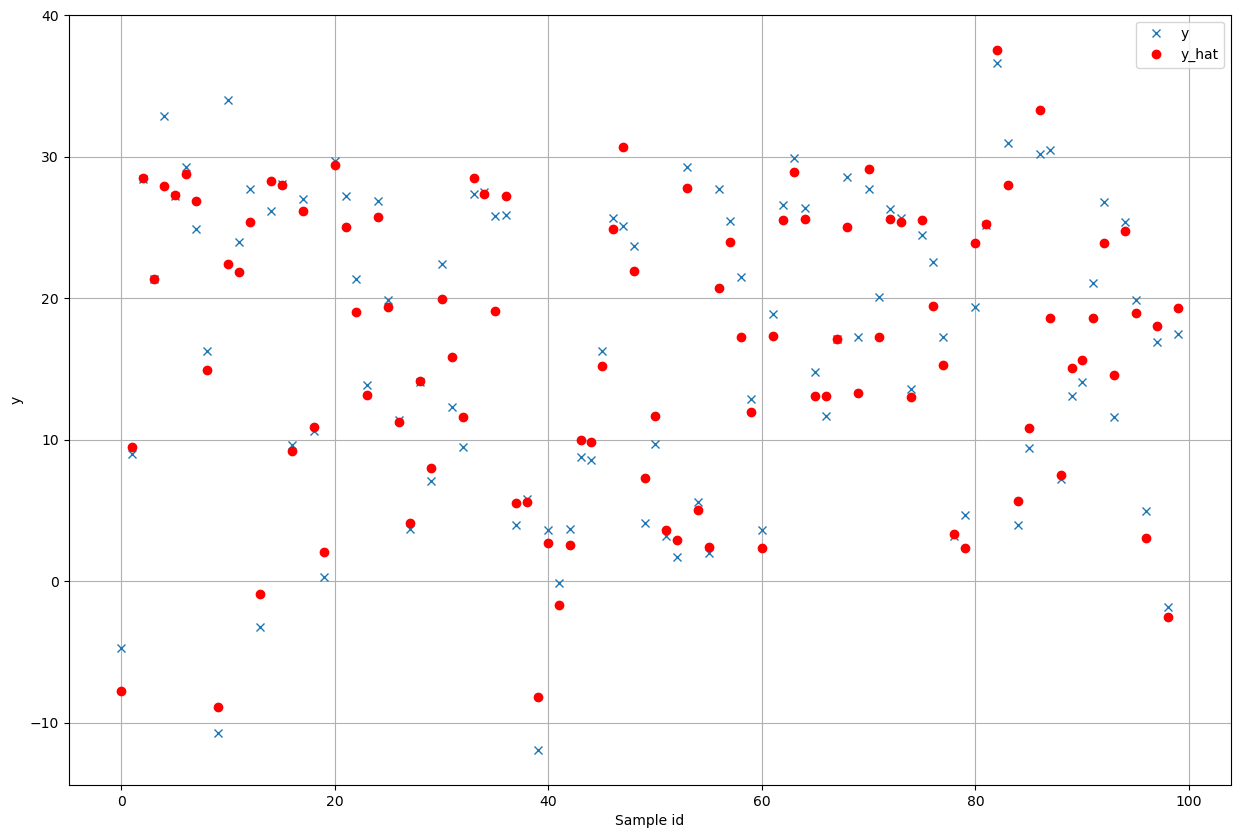

In [32]:
plt.figure(figsize=(15, 10))
st = 1000
en = 1100
plt.plot(np.arange(en-st), y_test[st:en], 'x')
plt.plot(np.arange(en-st), y_hat[st:en], 'ro')
plt.xlabel('Sample id')
plt.ylabel('y')
plt.legend(['y', 'y_hat'])
plt.grid()
plt.show()

## 2.4 Random Forest Regression

Η εκτέλεση του RFR δοκιμάστηκε για 4 διαφορετικές περιπτώσεις αριθμών δέντρων.

In [33]:
n_estimators = [10, 25, 50, 100]

for n_estimator in n_estimators:
    # Initialize the RandomForestRegressor model
    rf_regressor = RandomForestRegressor(n_estimators=n_estimator, random_state=42)

    # Train the model
    rf_regressor.fit(X_train_sc, y_train)

    # Predict on the test set
    y_hat = rf_regressor.predict(X_test_sc)

    # Calculate mean squared error
    mse = metrics.mean_squared_error(y_test, y_hat)
    mae = metrics.mean_absolute_error(y_test, y_hat)

    print(f"Mean Squared Error with {n_estimator} estimators: {mse}")
    print(f"Mean Absolute Error with {n_estimator} estimators: {mae}")

Mean Squared Error with 10 estimators: 2.4895979766666665
Mean Absolute Error with 10 estimators: 0.929051
Mean Squared Error with 25 estimators: 2.3779347866666667
Mean Absolute Error with 25 estimators: 0.9038140000000001
Mean Squared Error with 50 estimators: 2.329943731866667
Mean Absolute Error with 50 estimators: 0.8943651333333333
Mean Squared Error with 100 estimators: 2.3182932714333333
Mean Absolute Error with 100 estimators: 0.8899552333333335


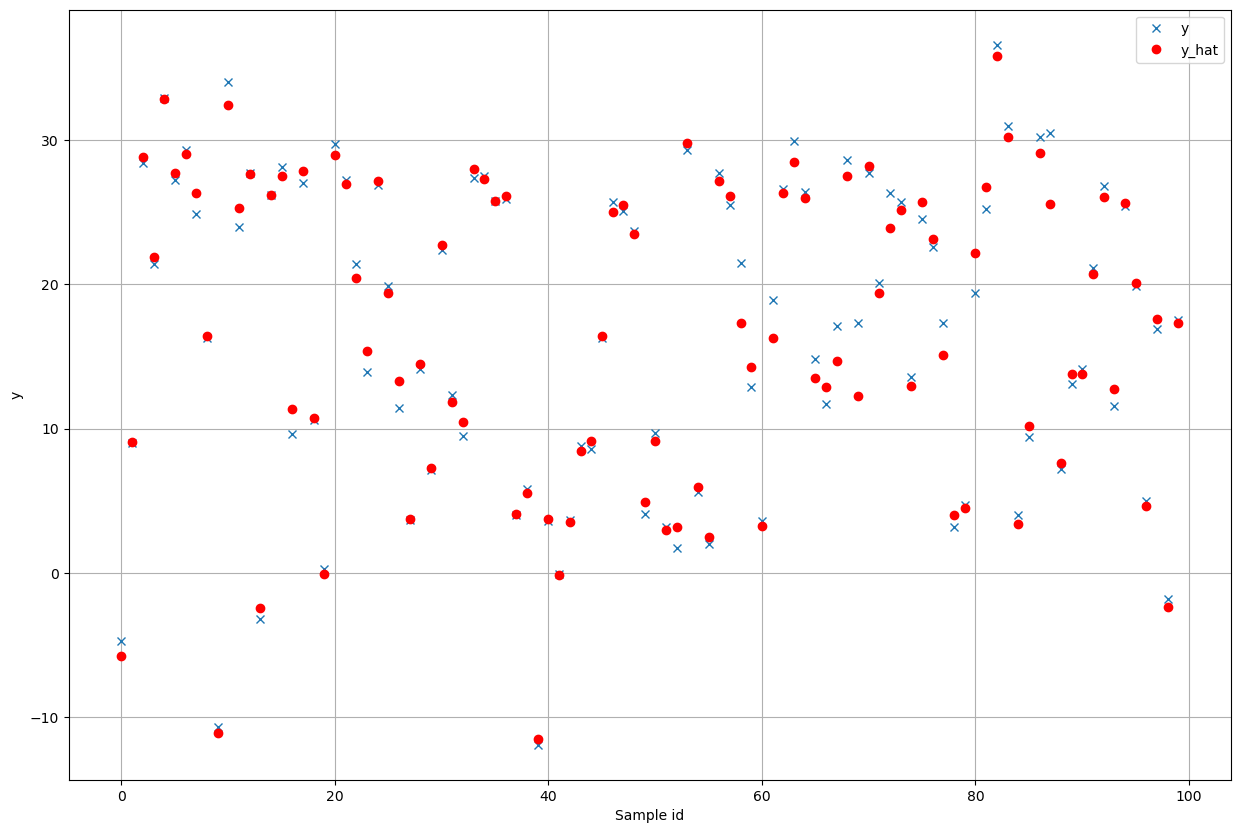

In [34]:
plt.figure(figsize=(15, 10))
st = 1000
en = 1100
plt.plot(np.arange(en-st), y_test[st:en], 'x')
plt.plot(np.arange(en-st), y_hat[st:en], 'ro')
plt.xlabel('Sample id')
plt.ylabel('y')
plt.legend(['y', 'y_hat'])
plt.grid()
plt.show()

Κρίνοντας απο τη φύση των δεδομένων, μπορούμε να πούμε πως οι μετρικές δίνουν αποτελέσματα αρκετά ικανοποιητικά για την αξιολόγηση των μοντέλων και ειδικά για τη περίπτωση του Random Forest.

1. **Mean Squared Error (MSE)**: Το MSE μετρά τη μέση τετραγωνική διαφορά μεταξύ των πραγματικών και των προβλεπόμενων τιμών. Χαμηλότερες τιμές του MSE υποδεικνύουν καλύτερη απόδοση του μοντέλου ωστόσο, η ερμηνεία του MSE εξαρτάται από την κλίμακα της μεταβολής του προς πρόβλεψη φαινομένου. Στη περίπτωση μας, μπορούμε να πούμε πως μια απόκλιση τιμών της τάξης του 2,38% είναι αποδεκτή καθώς δεν είναι μεγάλη ως απόκλιση ακριβείας για μετρήσεις θερμοκρασίας.

2. **Mean Absolute Error (MAE)**: Το MAE μετρά τη μέση απόλυτη διαφορά μεταξύ των πραγματικών και των προβλεπόμενων τιμών. Όπως και το MSE, χαμηλότερες τιμές του MAE υποδεικνύουν καλύτερη απόδοση του μοντέλου. Το MAE μετράει τη μέση απόκλιση μεταξύ των πραγματικών τιμών και των προβλεπόμενων τιμών

Να σημειωθεί πως όσο μεγαλύτερο δείγμα του dataset χρησιμοποιείται, τόσο καλύτερα αποτελέσματα λαμβάνονται αλλα σαφώς αυτό επηρεάζει τη χρονική διάρκεια της εκτέλεσης των αναλύσεων.